<a href="https://colab.research.google.com/github/AgustinSiben/AprMaq/blob/main/Trabajo_practico_3_AM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo práctico 3 - Ejericio 3.1

## Creo un grupo de datos de dos dimenciones

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#Creo dos dataframes de con forma de función gaussiana
muA, sigmaA = 5,10 # Media y desviación estandar
muB, sigmaB = 5,10
n = 100 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

df1 = pd.DataFrame({'feature0' : a, 'feature1': b,'Etiq.': 0})
df1



,feature0,feature1,Etiq.
0,12.830352,1.729433,0
1,6.742235,-3.681101,0
2,1.011001,22.492289,0
3,1.589407,6.905579,0
4,0.870567,15.655956,0
...,...,...,...
95,15.504631,13.350771,0
96,9.329133,10.588463,0
97,-6.393872,-1.266532,0
98,-0.223110,-0.131520,0


##Creo el segundo grupo de datos

In [ ]:
#Realizó lo mismo pero con otras caracteristicas
muA, sigmaA = 30, 10 # Media y desviación estandar
muB, sigmaB = 30,10
n = 100 #Cantidad de valores
a = np.random.normal(muA, sigmaA, n)
b = np.random.normal(muB, sigmaB, n)

df2 = pd.DataFrame({'feature0' : a, 'feature1': b,'Etiq.': 1})
df2

,feature0,feature1,Etiq.
0,51.750819,49.952813,1
1,39.386295,31.772323,1
2,45.635059,10.360921,1
3,42.619218,37.204292,1
4,13.066358,31.799228,1
...,...,...,...
95,31.817362,49.691003,1
96,33.011495,39.713371,1
97,12.114738,33.814014,1
98,11.267932,24.512888,1


## Muestro los distintos grupos de datos

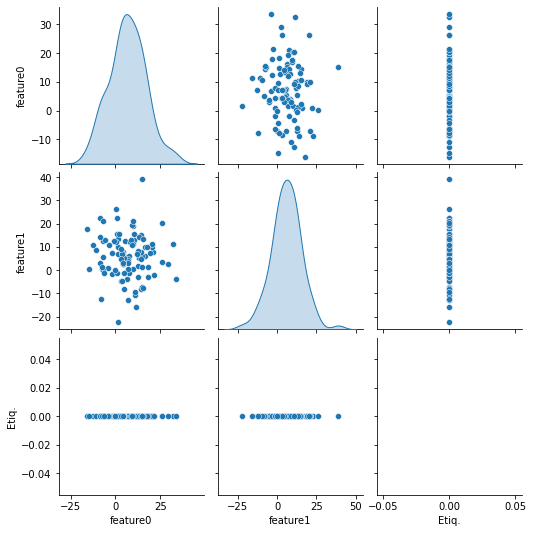

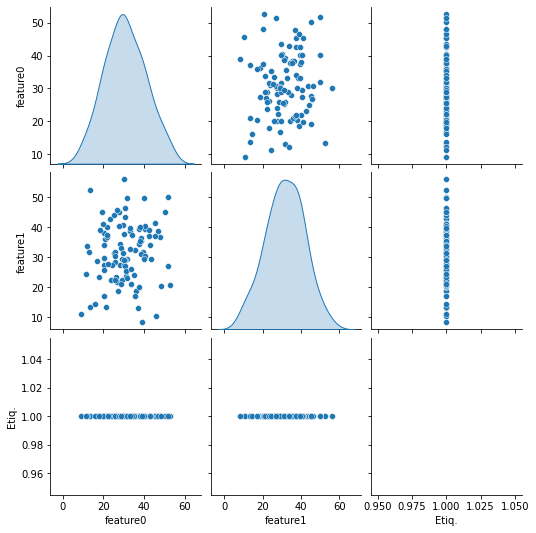

In [ ]:
import seaborn as sns

sns.pairplot(df1, diag_kind="kde")

sns.pairplot(df2, diag_kind="kde")

##Junto los gupos de datos

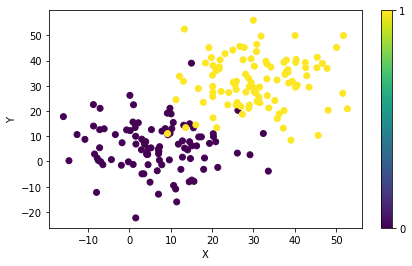

In [ ]:
df = df1.append(df2,ignore_index='true')
plt.figure(figsize=(7, 4))
plt.scatter(df['feature0'].values, df['feature1'].values, c = (df['Etiq.'].values))
plt.colorbar(ticks=[0, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##Creo el grupo de datos para entrenar el clasificador tomando 50 datos de cada grupo

In [ ]:
temp = df1.iloc[0:50]
temp = temp.append(df2.iloc[0:50])
#features
X = temp[['feature0','feature1']].values
#target
y = temp['Etiq.'].values
y = y.reshape(-1,1)

##Agrego un clasificador y le doy los datos X,y. Luego los uso para hacer las predicciones utilizando distintos valores de vecinos cercanos.

In [ ]:
from sklearn import neighbors

k = 10
knn = neighbors.KNeighborsClassifier(n_neighbors = k)
knn.fit(X , y.astype(int))

#Hago una predicción de prueba
resultado = knn.predict([[1, 11],[80,  80]])
print(resultado)



[0 1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """


##Utilizo todo el conjunto de datos y predigo la etiqueta

In [ ]:
temp = df1.append(df2,ignore_index='true')
#features
valX = temp[['feature0','feature1']].values
#target
valY = temp['Etiq.'].values
y = y.reshape(-1,1)

resultados = knn.predict(valX)
df['predicción'] = resultados
df

,feature0,feature1,Etiq.,predicción
0,12.830352,1.729433,0,0
1,6.742235,-3.681101,0,0
2,1.011001,22.492289,0,0
3,1.589407,6.905579,0,0
4,0.870567,15.655956,0,0
...,...,...,...,...
195,31.817362,49.691003,1,1
196,33.011495,39.713371,1,1
197,12.114738,33.814014,1,1
198,11.267932,24.512888,1,0


Compruebo errores y aciertos

In [ ]:
#Supongo 0 como negativo y 1 como positivo
tE = []
for i in range(200):
    if df.iloc[i,2] == 1 and df.iloc[i,3] == 1:
        tE.append('VP')
    elif df.iloc[i,2] == 0 and df.iloc[i,3] == 0:
        tE.append('VN')
    elif df.iloc[i,2] == 0 and df.iloc[i,3] == 1:
        tE.append('FP')
    elif df.iloc[i,2] == 1 and df.iloc[i,3] == 0:
        tE.append('FN')

df['Tipo de Error'] = tE

fp, fn, vp, vn = [np.sum(df['Tipo de Error'] == tE) for tE in ['FP', 'FN', 'VP', 'VN']]

TPR = vp/(vp+fn)
FPR = fp/(fp+vn)
PPV = vp/(vp+fp)
f = 2*TPR*PPV/(TPR+PPV)

print('TPR:', np.round(TPR, 2))
print('FPR:', np.round(TPR, 2))
print('PPV:', np.round(PPV, 2))
print('F:', np.round(f, 2))


df.sample(10)

TPR: 0.94
FPR: 0.94
PPV: 0.97
F: 0.95


,feature0,feature1,Etiq.,predicción,Tipo de Error
20,7.002842,4.871588,0,0,VN
183,25.571806,30.442690,1,1,VP
117,23.792626,22.488962,1,1,VP
195,31.817362,49.691003,1,1,VP
30,20.876701,7.828870,0,0,VN
8,13.361341,5.322055,0,0,VN
132,37.209024,13.201419,1,1,VP
98,-0.223110,-0.131520,0,0,VN
112,20.106334,34.210661,1,1,VP
1,6.742235,-3.681101,0,0,VN


# Trabajo práctico 3 - Ejericio 3.3


## Importo el dataset

In [ ]:
import pandas as pd
attributes_spotify = pd.read_csv("https://raw.githubusercontent.com/emmanueliarussi/DataScienceCapstone/master/3_MidtermProjects/ProjectBOM/data/attributes_spotify.csv")
attributes_spotify.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [ ]:
attributes_spotify.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


##Elimino columnas que no considero importantes a la hora de hacer la predicción. También separo el target de los datos para la predicción.

Considero de poca importancia el nombre de la canción y del artista, también la columna que tiene los indices duplicados.

In [ ]:
del attributes_spotify['artist'], attributes_spotify['song_title'], attributes_spotify['Unnamed: 0']
attributes_spotify

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0


## Para entrenar el clasificador utilizo la mitad de los datos.

In [ ]:
data = attributes_spotify.sample(1000)
y = data['target']
X = data.copy()
del X['target']

##Agrego un clasificador y le doy los datos X,y. Hago varias predicciones para encontar un valor de N vecinos adecuado.

Luego los uso los datos y el número de vecinos más cercanos para hacer las predicciones.

In [ ]:
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)
X

Mejor valor de N:  {'n_neighbors': 90}
Mejor performance:  0.5999999999999999


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
1225,0.003730,0.862,263827,0.608,0.000006,7,0.0856,-4.762,1,0.0402,120.002,4.0,0.825
1411,0.358000,0.894,216520,0.284,0.000487,11,0.1100,-13.002,0,0.3300,138.944,4.0,0.413
1242,0.017600,0.621,215050,0.674,0.000000,6,0.2420,-4.635,0,0.0323,92.994,4.0,0.255
1573,0.949000,0.386,567920,0.148,0.792000,0,0.0665,-18.921,0,0.0367,94.880,4.0,0.128
448,0.000910,0.516,251011,0.660,0.000000,9,0.0663,-5.002,0,0.0489,112.065,4.0,0.238
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1657,0.017800,0.690,230792,0.841,0.790000,4,0.1370,-5.592,0,0.0868,130.052,4.0,0.533
609,0.000031,0.610,420384,0.907,0.698000,11,0.2300,-5.857,0,0.0384,112.007,4.0,0.397
1254,0.029800,0.306,293331,0.742,0.000000,11,0.1260,-3.914,1,0.0427,155.873,3.0,0.149
1183,0.304000,0.804,298941,0.459,0.086200,11,0.1100,-11.556,1,0.0390,111.963,4.0,0.372


##Observando que las mejore performances suelen rondar los 0.6 decido quitar manualmente algunas de las columnas y observar resultados

Algunos parámetros que pueden no estar relacionados con los gustos de la canción pueden ser, el modo, el compás, la nota y la duración de la canción. Elimino estos parámetros y observo el resultado

In [ ]:
del X['key'] ,X['time_signature'], X['mode'], X['duration_ms']
knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)

Mejor valor de N:  {'n_neighbors': 30}
Mejor performance:  0.61


## Eliminando las columnas mejoró la predicción. Para mejorarlo aún más normalizo los parametros del dataset. Para esto utilizo una librería de sklearn

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_norm = pd.DataFrame(scaler.transform(X),columns=X.columns)
X_norm.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,-0.717515,1.493805,-0.353857,-0.496316,-0.656382,0.626064,-0.565771,-0.081803,1.311321
1,0.624318,1.690940,-1.898940,-0.494580,-0.492687,-1.593816,2.561859,0.617831,-0.355032
2,-0.664981,0.009136,-0.039117,-0.496338,0.392877,0.660278,-0.651030,-1.079358,-0.994070
3,2.862789,-1.438571,-2.547494,2.362112,-0.784520,-3.188413,-0.603544,-1.009698,-1.507728
4,-0.728196,-0.637712,-0.105880,-0.496338,-0.785862,0.561407,-0.471877,-0.374960,-1.062827


##Con los valores normalizados vuelvo a entrenar el clasificador

In [ ]:
knn = neighbors.KNeighborsClassifier()
#A los parámetros le agrego los valores de n con los que quiero hacer la grilla
params_grid = {'n_neighbors': [5*n for n in range(1, 21)]}
knn_grid = GridSearchCV(knn, params_grid, cv=10) #Utilizo 5 validaciones cruzadas
#Entreno el clasificador con todos los valores de n
knn_grid.fit(X_norm,y)
#Obtengo la mejor clasificación
print('Mejor valor de N: ',knn_grid.best_params_)
print('Mejor performance: ',knn_grid.best_score_)

Mejor valor de N:  {'n_neighbors': 55}
Mejor performance:  0.708


## Normalizando los valores se mejora la predicción. Para mejorar esto se podrían usar mas datos del dataset y hacer una grilla con saltos mas pequeños, de esta forma encontrar un mejor N para los vecinos cercanos